<a href="https://colab.research.google.com/github/saghar-trade/Unsupervised-Learning/blob/main/Help_International_clustering_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# Data Preprocessing
import pandas as pd

In [77]:
# Load the dataset
data = pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

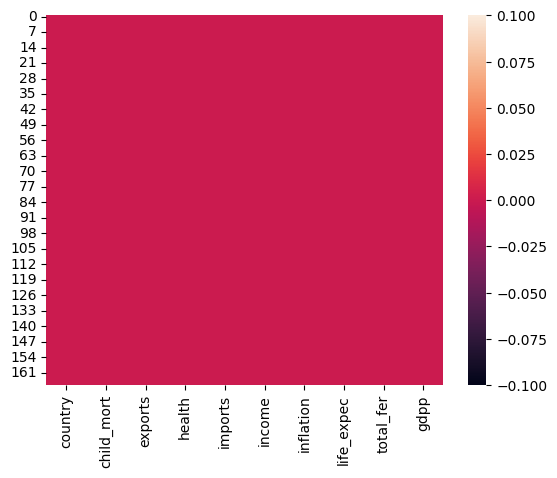

In [80]:
sns.heatmap(data.isnull())

In [81]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

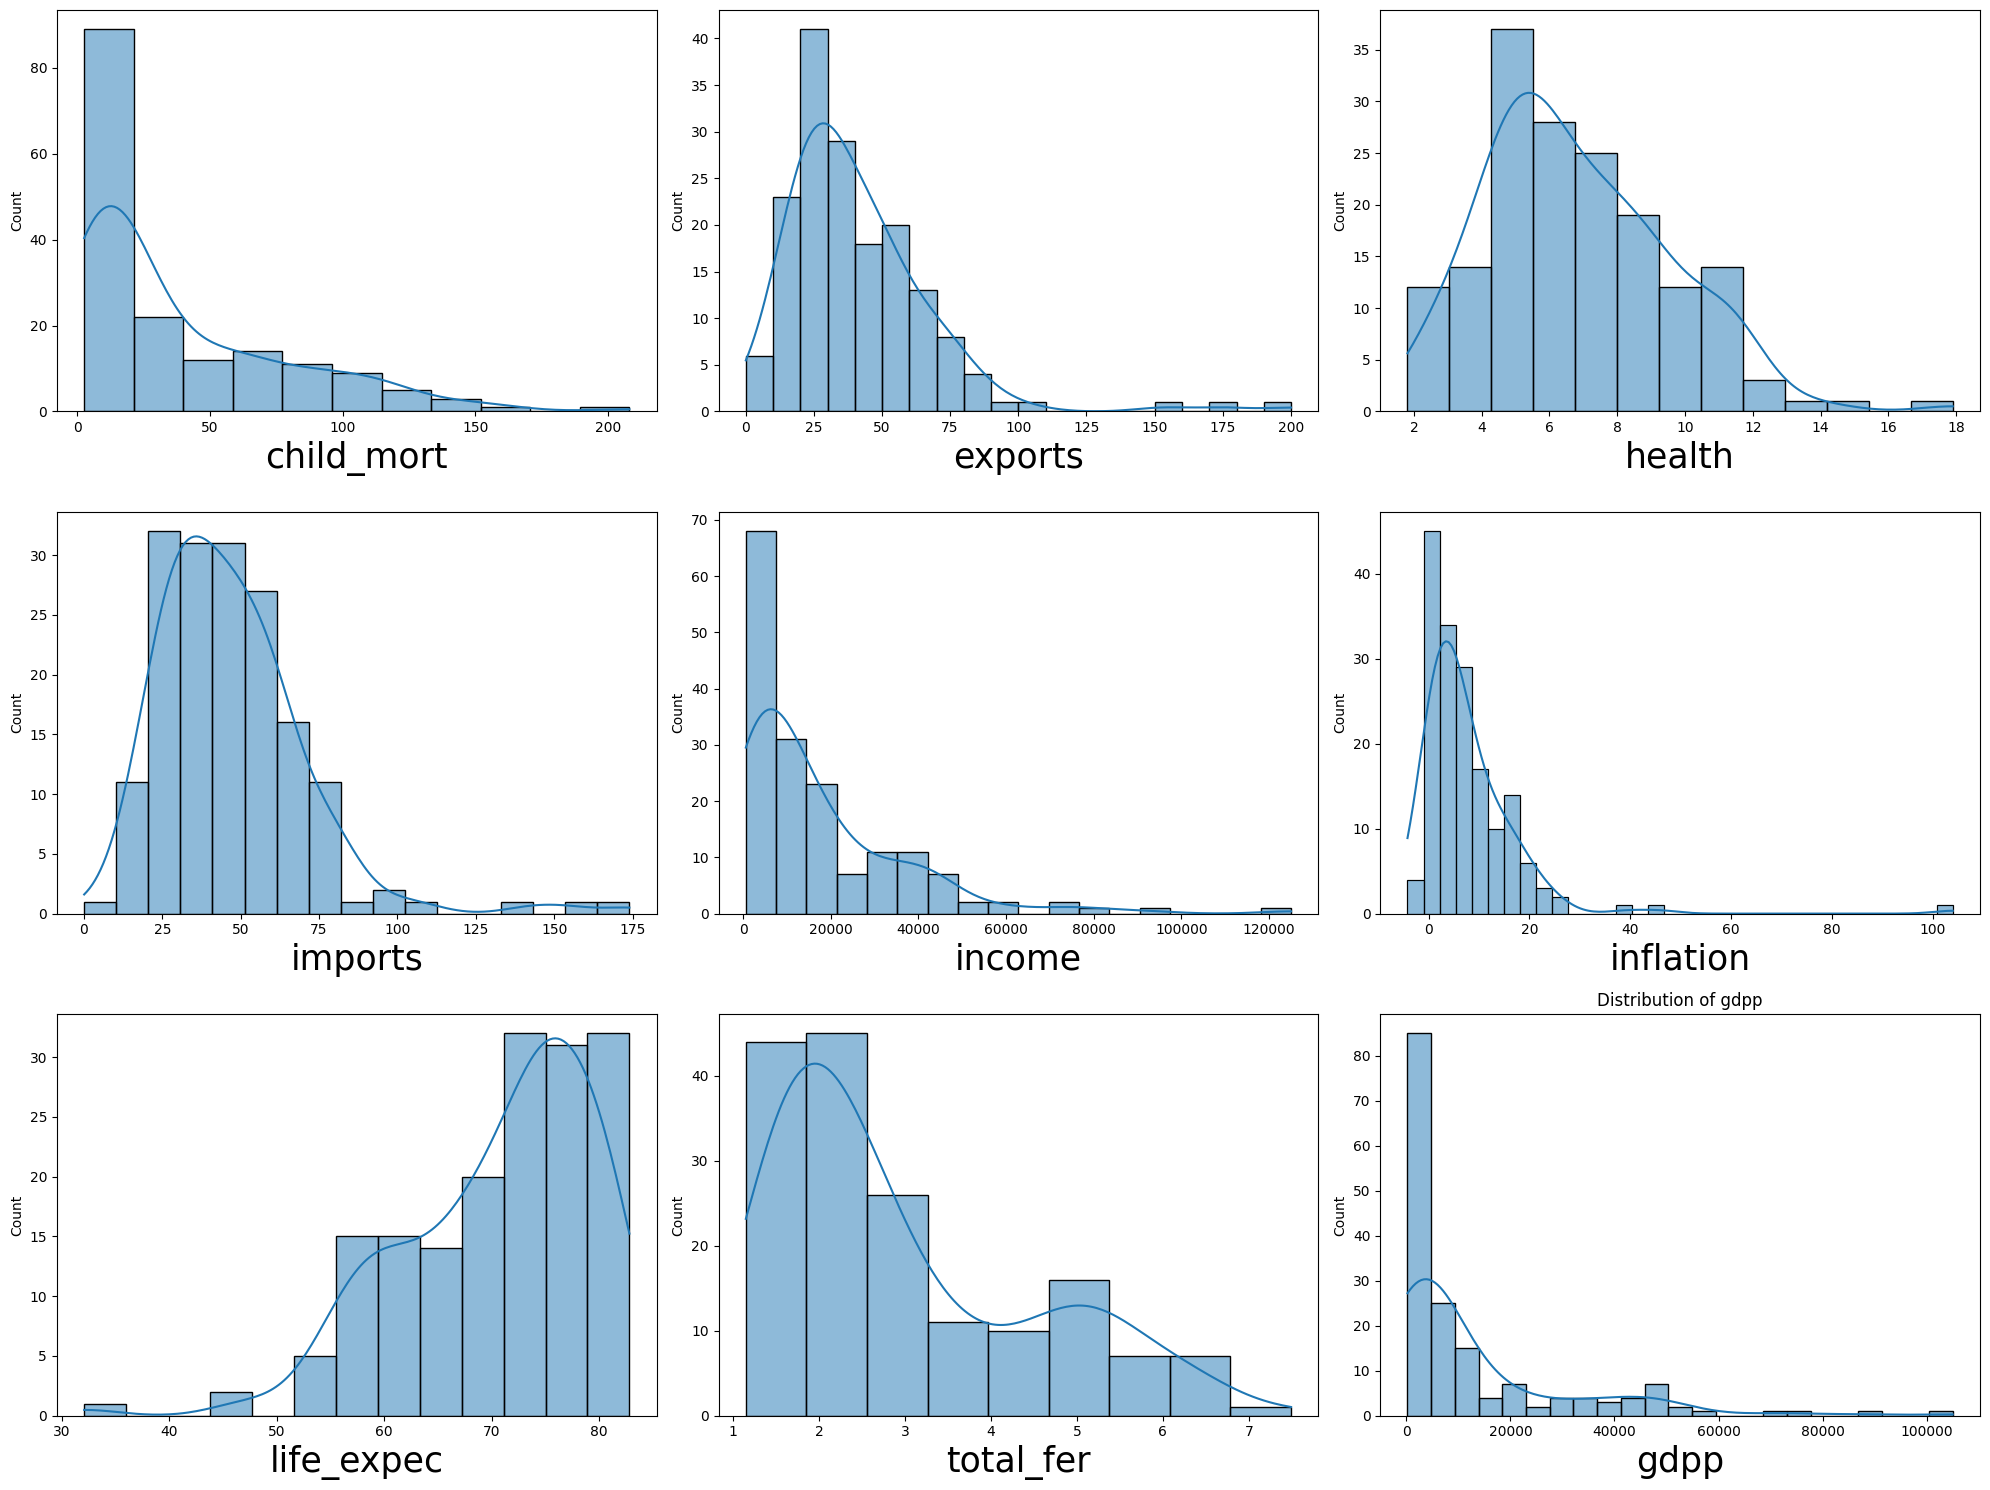

In [82]:
n_features  =len(data.columns)
num_cols = 3
num_rows = (n_features + 1)//num_cols

fig, axes = plt.subplots(ncols= num_cols, nrows = num_rows, figsize = (20,15))

position  = axes.flatten()

for index, column_name in enumerate(data.columns[1:]):
    plot = sns.histplot(data = data[column_name], kde=True, ax = position[index])
    plt.title(f'Distribution of {column_name}')
    plot.set_xlabel(column_name, size=25)

plt.tight_layout()

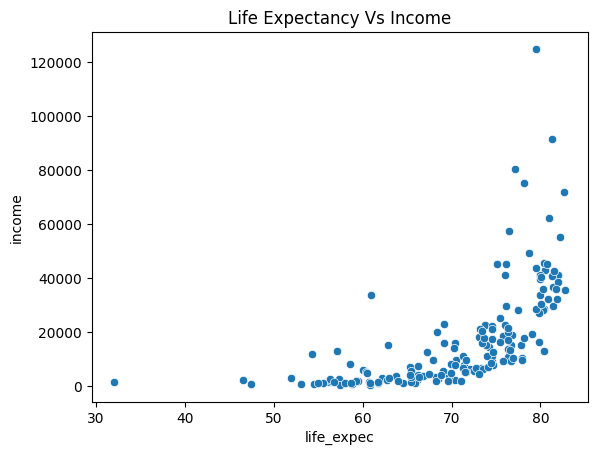

In [83]:
sns.scatterplot(x='life_expec', y='income', data=data)
plt.title("Life Expectancy Vs Income")
plt.show()

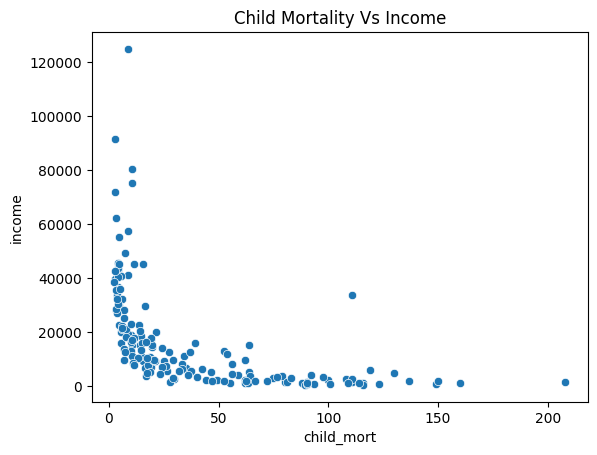

In [84]:
# Child Mortality Vs Income

sns.scatterplot(x='child_mort', y='income', data=data)
plt.title("Child Mortality Vs Income")
plt.show()

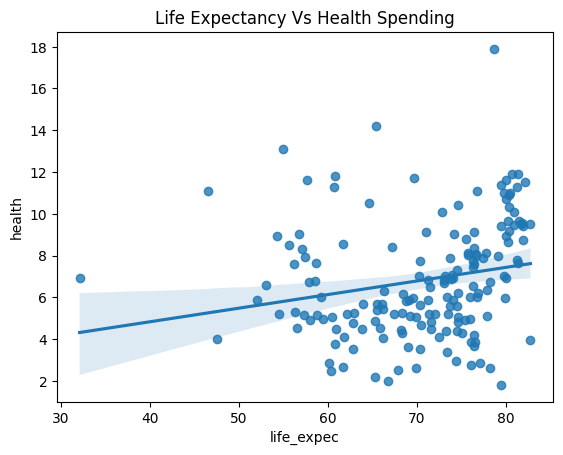

In [85]:
sns.regplot(x='life_expec', y='health', data=data)
plt.title("Life Expectancy Vs Health Spending")
plt.show()

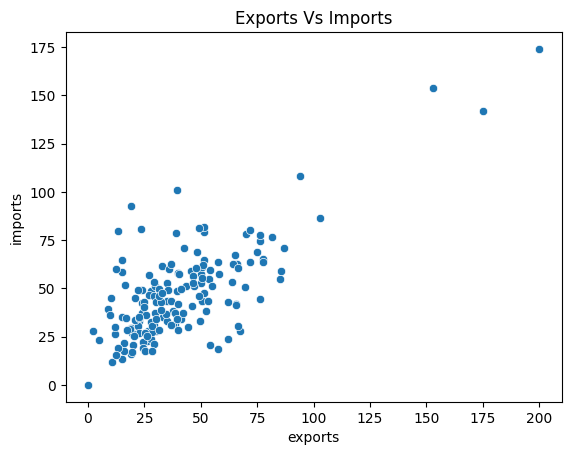

In [86]:
sns.scatterplot(x='exports', y='imports', data=data)
plt.title("Exports Vs Imports")
plt.show()

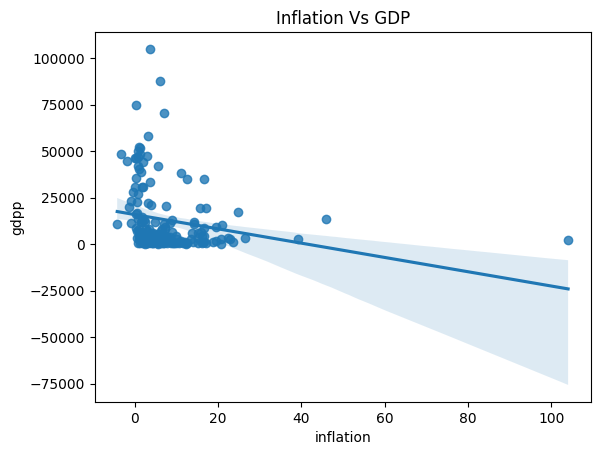

In [87]:
sns.regplot(x='inflation', y='gdpp', data=data)
plt.title("Inflation Vs GDP")
plt.show()

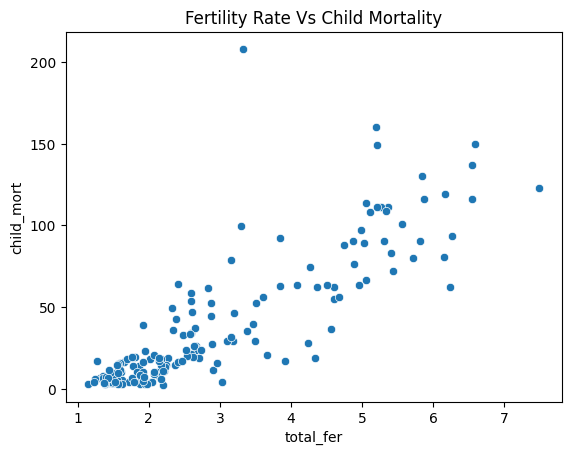

In [88]:
sns.scatterplot(x='total_fer', y='child_mort', data=data)
plt.title("Fertility Rate Vs Child Mortality")
plt.show()

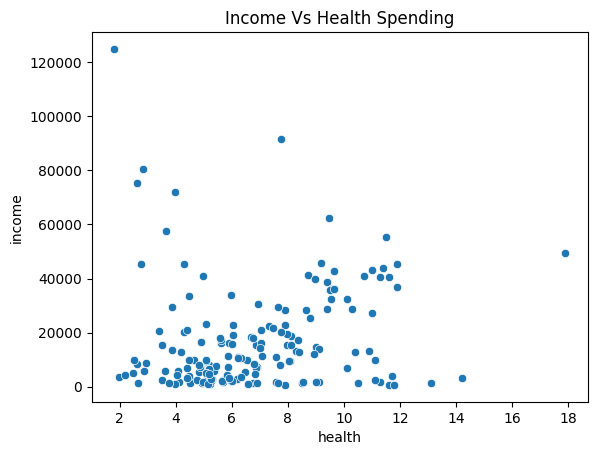

In [89]:
sns.scatterplot(x='health', y='income', data=data)
plt.title("Income Vs Health Spending")
plt.show()

In [90]:
data.sort_values(by='child_mort', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [91]:
top_five_child_mort = data.sort_values(by='child_mort', ascending=False)[:5]

In [92]:
least_five_child_mort = data.sort_values(by='child_mort')[:5]

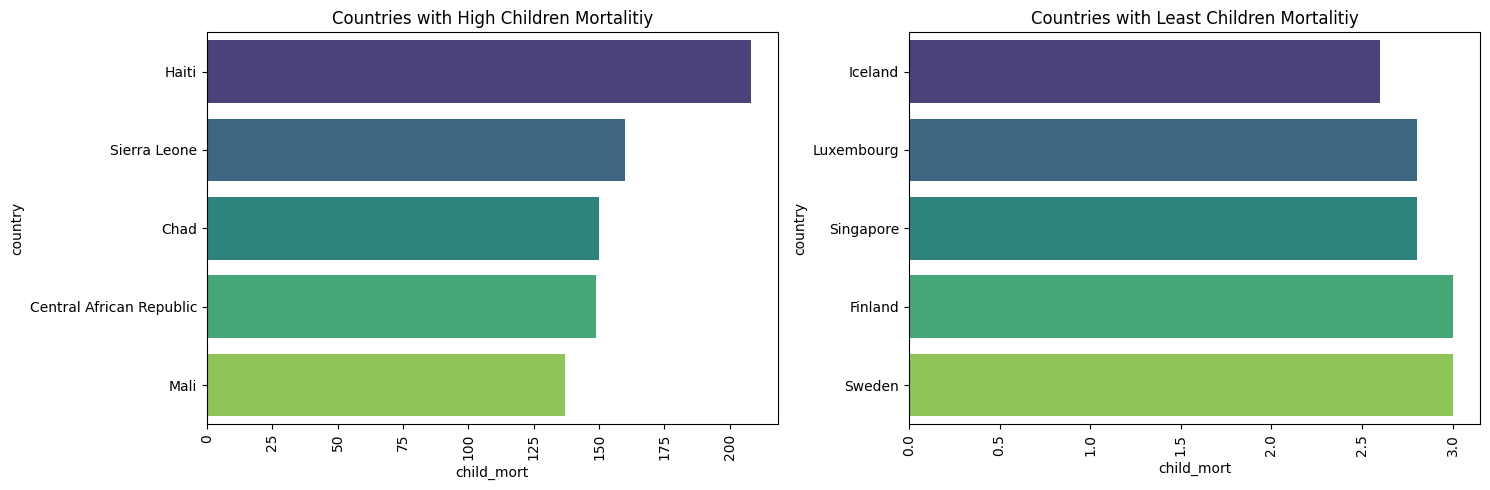

In [93]:
import warnings

warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x ='child_mort', y ='country', data=top_five_child_mort, orient='h', palette='viridis')
plt.title('Countries with High Children Mortalitiy')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x ='child_mort', y ='country', data=least_five_child_mort, orient='h', palette='viridis')
plt.title('Countries with Least Children Mortalitiy')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Multivariate **Analysis**

In [94]:
numerical_data_corr =data.select_dtypes(exclude='object').corr()

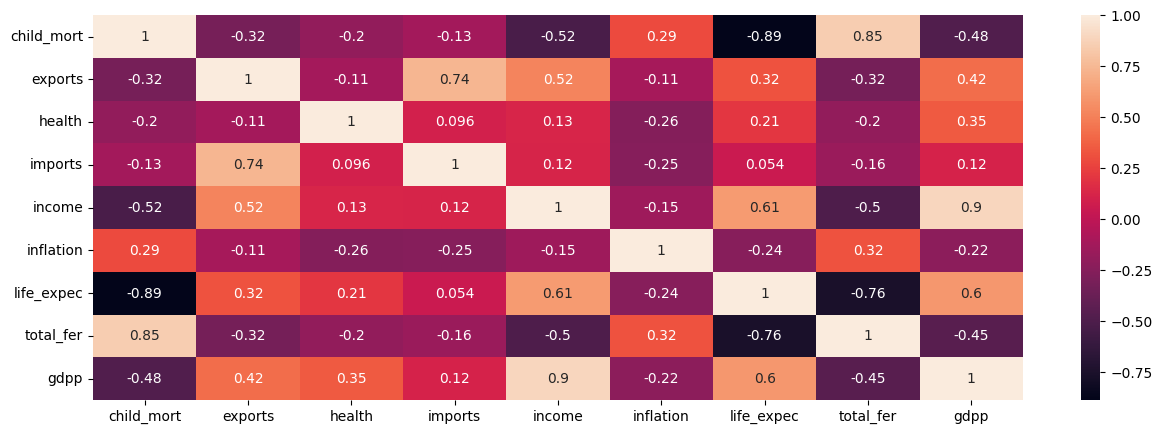

In [95]:
import numpy as np
plt.figure(figsize=(15, 5))
sns.heatmap(numerical_data_corr, annot=True)
plt.show()

**Feature Engineering**

Some features belong to similar categories and behave similarly with features from other categories:

Lets create new features that fall into the three categories:

**Health**: child mortality, health, life expectancy, total fertility rate

**Trade**: imports, exports

**Finance**: income, inflation, GDP per capita

In [96]:
new_data = pd.DataFrame()
new_data['Health'] = ((data['life_expec'] / data['life_expec'].mean()) +
                      (data['health'] / data['health'].mean()) -
                      (data['child_mort'] / data['child_mort'].mean()) -
                      (data['total_fer'] / data['total_fer'].mean())
)

new_data['Trade'] = data['imports']/data['imports'].mean() +  (data['exports']/data['exports'].mean())

new_data['Finance'] = (data['income']/data['income'].mean()) + (data['gdpp']/data['gdpp'].mean()) - (data['inflation']/data['inflation'].mean())

In [97]:
new_data

,Health,Trade,Finance
0,-2.422504,1.200812,-1.076519
1,1.048966,1.717580,0.317688
2,0.002385,1.603752,-0.972476
3,-3.929096,2.430387,-2.262080
4,0.981553,2.362940,1.870058
...,...,...,...
162,-0.287065,2.257474,0.064477
163,0.504365,1.068624,-3.894624
164,0.769324,3.461820,-1.191967
165,-1.338566,1.463396,-2.670352


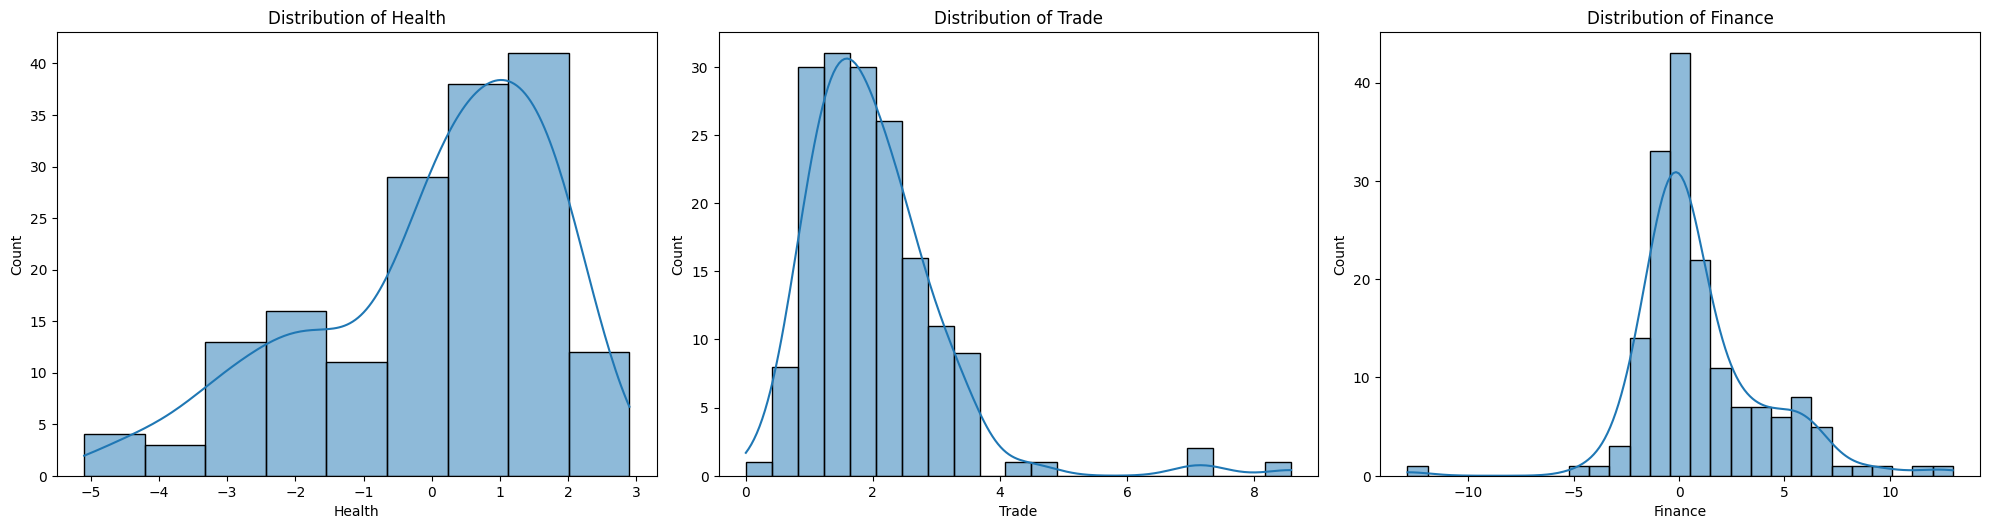

In [98]:
# Plotting distributions for each numerical feature
plt.figure(figsize=(20, 15))

for i, column in enumerate(new_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(new_data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [99]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PowerTransformer

standardscaler = StandardScaler()

In [100]:
new_data[new_data.columns.tolist()] = standardscaler.fit_transform(new_data[new_data.columns.tolist()])

In [101]:
standardscaler.get_feature_names_out()

array(['Health', 'Trade', 'Finance'], dtype=object)

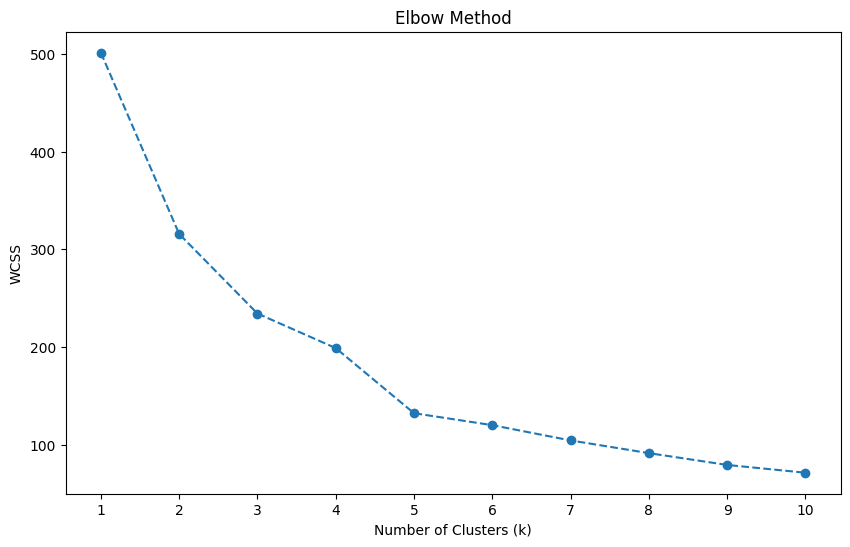

In [102]:
from sklearn.cluster import KMeans

# Apply the Elbow Method to find the optimal number of clusters (k)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):  # Trying k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

In [103]:
df_new=data.drop('country',axis=1)
for column in df_new:
  df_new[column]=df_new[column].astype(np.float32)

In [104]:
df_new.dtypes.value_counts()

,count
float32,9


array([[<Axes: title={'center': 'child_mort'}>,
        <Axes: title={'center': 'exports'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'imports'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'inflation'}>],
       [<Axes: title={'center': 'life_expec'}>,
        <Axes: title={'center': 'total_fer'}>,
        <Axes: title={'center': 'gdpp'}>]], dtype=object)

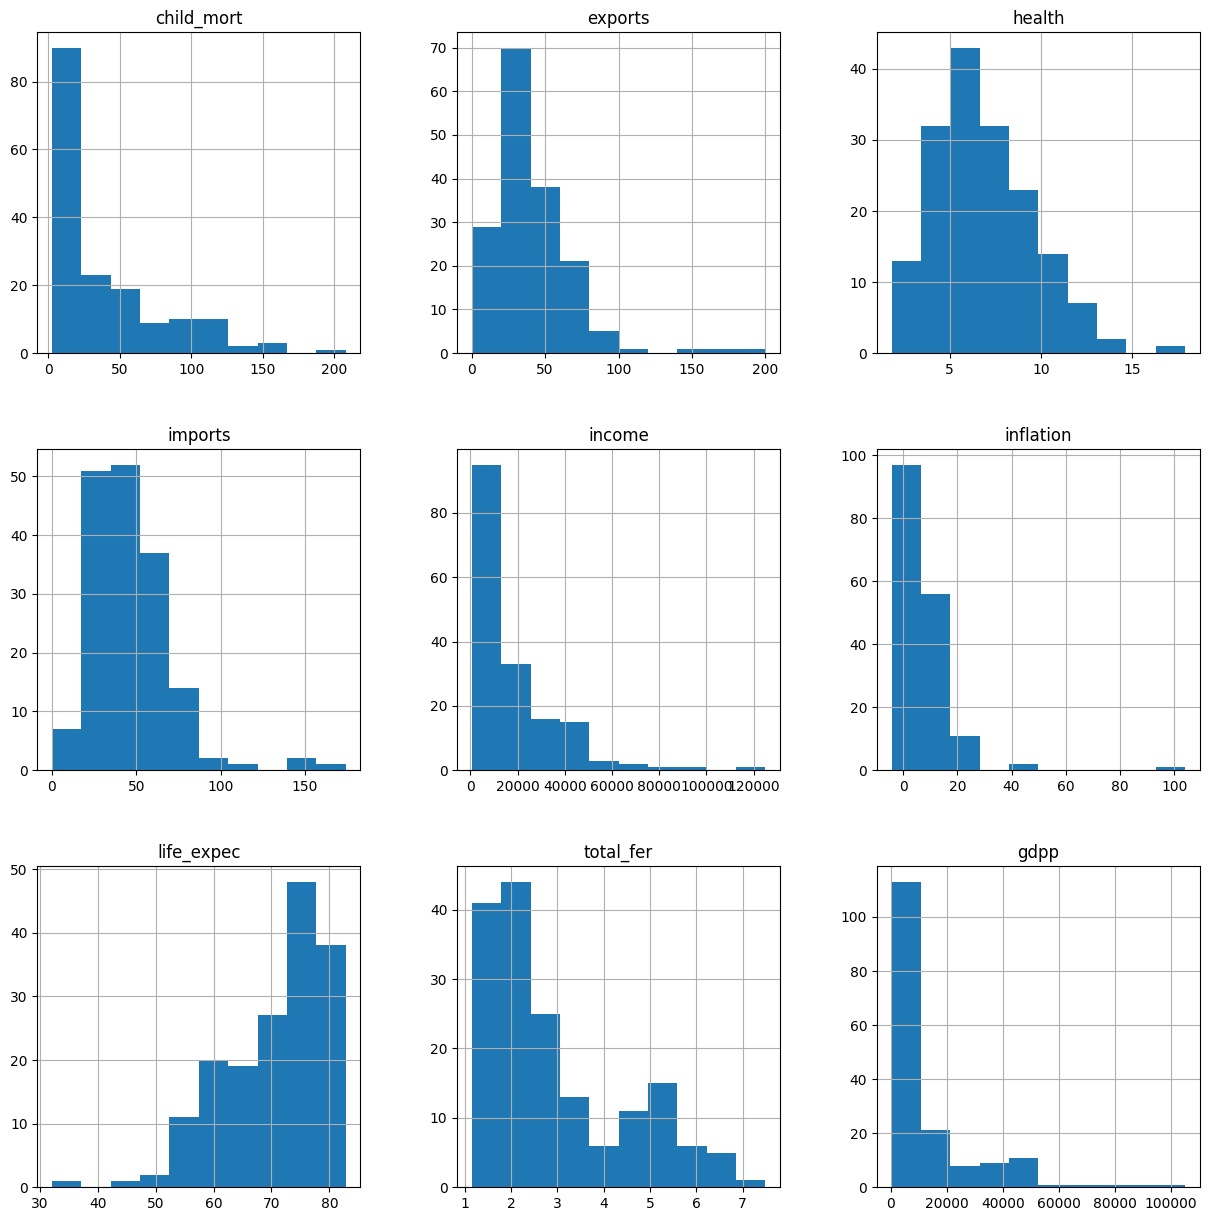

In [105]:
label=data['country']
df_new.hist(figsize=(15,15))

In [106]:
skew_limit = 0.75
skew_vals = df_new.skew()

high_skew = skew_vals[skew_vals > skew_limit]

skew_cols = high_skew.sort_values(ascending=False).to_frame().rename(columns={0: 'Skew'})
skew_cols


,Skew
inflation,5.154049
exports,2.445824
income,2.231480
gdpp,2.218051
imports,1.905276
child_mort,1.450774
total_fer,0.967092


In [111]:
for col in skew_cols.index:
  df_new[col]=np.log1p(df_new[col])

In [112]:
X=np.array(df_new)

In [113]:
from sklearn.decomposition import PCA


In [114]:
scaled_data = standardscaler.fit_transform(df_new)

In [115]:
pca=PCA()

In [125]:
explained_variance=np.round(pca.explained_variance_ratio_*100,2)
print(explained_variance)

[54.06 16.78 13.44  7.08  3.96  2.48  1.38  0.68  0.15]


In [124]:
print(pca.singular_values_)

[28.505577  15.882601  14.210224  10.31329    7.713958   6.102702
  4.551079   3.1962402  1.4847107]


In [118]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(df_new)

scaled_data = standardscaler.fit_transform(imputed_data)
pca_data = pca.fit_transform(scaled_data)

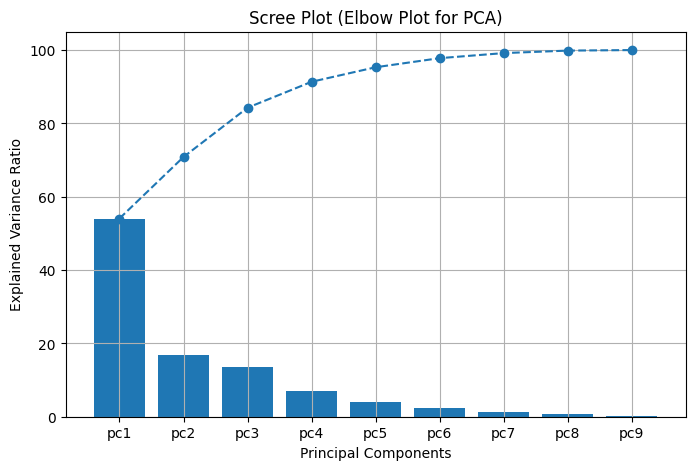

In [127]:
pc_list = ['pc' + str(i+1) for i in range(len(explained_variance))]

plt.figure(figsize=(8,5))
plt.bar(pc_list, explained_variance)
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Scree Plot (Elbow Plot for PCA)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [128]:
total_variance = np.cumsum(pca.explained_variance_ratio_)
for i in range(9):
  print("pc {:2d}, explained var:{:.2f}".format(i+1,total_variance[i]))

pc  1, explained var:0.54
pc  2, explained var:0.71
pc  3, explained var:0.84
pc  4, explained var:0.91
pc  5, explained var:0.95
pc  6, explained var:0.98
pc  7, explained var:0.99
pc  8, explained var:1.00
pc  9, explained var:1.00
